In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from sklearn.metrics import confusion_matrix
from gensim.models import Word2Vec

### Wine review data

The data below was gathered from the website https://www.winemag.com/. It was extracted using tesseract and cleaned by hand. There is a chance to have some errors. The datasets were gathered like this because of a scrapping protection on the website.

All the wines that are present below are from Portugal - Vinho Verde. <br>
Wine name - name of the wine <br>
Score - 0/100 <br>
Price - in USD <br>
Alcohol - in % <br>
Coutry of origin - the country in which the wine was produced <br>
Review - The review from the website <br>
Sommelier - The person that wrote the review <br>
Wine type - 0 for white wine and 1 for red wine <br>

First we load the two datasets separetly, clean the data, make EDA and after that it is merged for ease of use.

In [48]:
text_data_whites = pd.read_csv('data/whites.txt', header = None, sep = ', ',
                    names = ['Wine name', 'Score', 'Price', 'Year', 'Alcohol', 'Country of origin', 'Review', 'Sommelier'],
                              engine = 'python')

In [49]:
text_data_whites.insert(8, 'Wine type', 0)

In [50]:
text_data_whites

,Wine name,Score,Price,Year,Alcohol,Country of origin,Review,Sommelier,Wine type
0,J.Portugal Ramos Loureiro (Vinho Verde),87,10.0,2019,12.0,PORTUGAL,Louriero with a touch of Alvarinho has produce...,Roger Voss,0
1,Quinta da Raza Dom Diogo Arinto (Vinho Verde),87,17.0,2019,14.0,PORTUGAL,The Arinto as at home in Vinho Verde as Alente...,Roger Voss,0
2,Casa Ermelinda Freitas Porta Nova Loureiro (Vi...,87,9.0,2018,11.5,PORTUGAL,The Loureiro shows well in this dry wine with ...,Roger Voss,0
3,Sapateiro Colheita Branco White (Vinho Verde),87,9.0,2018,12.5,PORTUGAL,With the extra year from harvest the wine has ...,Roger Voss,0
4,Aveleda Fonte Branco White (Vinho Verde),86,10.0,2019,9.5,PORTUGAL,There is a light prickle on the tongue from th...,Roger Voss,0
5,Quinta da Calcada 2019 Portal da Calcada Reser...,86,14.0,2019,11.5,PORTUGAL,This is a classic dry Vinho Verde light textur...,Roger Voss,0
6,Fonte da Cobra White (Vinho Verde),85,NaN,2018,12.5,PORTUGAL,This soft style of wine has hints of yeastines...,Roger Voss,0
7,Casa do Valle Grande Escolha Alvarinho (Vinho ...,91,12.0,2018,13.5,PORTUGAL,This is a deliciously creamy wine ripe and ric...,Roger Voss,0
8,Quinta de Pacos Casa de Pacos Branco Loui,88,10.0,2018,13.5,PORTUGAL,This is a deliciously creamy wine ripe and ric...,Roger Voss,0
9,Borges Alvarinho (Vinho Verde),87,13.0,2018,13.0,PORTUGAL,From the northern region of the Vinho Verde cl...,Roger Voss,0


In [51]:
# Check for null values
text_data_whites.isna().sum()

Wine name            0
Score                0
Price                1
Year                 0
Alcohol              2
Country of origin    0
Review               0
Sommelier            0
Wine type            0
dtype: int64

In [52]:
# Create a function for ease of use to replace null values
def clean_nan(data, column):
    data[f'{column}'] = data[f'{column}'].astype(float)
    mean_value = round((data[f'{column}'].mean()), 2)
    data[f'{column}'] = data[f'{column}'].replace(np.nan, mean_value)

In [53]:
# Replace null values with the mean
clean_nan(text_data_whites, 'Alcohol')
clean_nan(text_data_whites, 'Price')

In [54]:
text_data_whites

,Wine name,Score,Price,Year,Alcohol,Country of origin,Review,Sommelier,Wine type
0,J.Portugal Ramos Loureiro (Vinho Verde),87,10.00,2019,12.00,PORTUGAL,Louriero with a touch of Alvarinho has produce...,Roger Voss,0
1,Quinta da Raza Dom Diogo Arinto (Vinho Verde),87,17.00,2019,14.00,PORTUGAL,The Arinto as at home in Vinho Verde as Alente...,Roger Voss,0
2,Casa Ermelinda Freitas Porta Nova Loureiro (Vi...,87,9.00,2018,11.50,PORTUGAL,The Loureiro shows well in this dry wine with ...,Roger Voss,0
3,Sapateiro Colheita Branco White (Vinho Verde),87,9.00,2018,12.50,PORTUGAL,With the extra year from harvest the wine has ...,Roger Voss,0
4,Aveleda Fonte Branco White (Vinho Verde),86,10.00,2019,9.50,PORTUGAL,There is a light prickle on the tongue from th...,Roger Voss,0
5,Quinta da Calcada 2019 Portal da Calcada Reser...,86,14.00,2019,11.50,PORTUGAL,This is a classic dry Vinho Verde light textur...,Roger Voss,0
6,Fonte da Cobra White (Vinho Verde),85,15.29,2018,12.50,PORTUGAL,This soft style of wine has hints of yeastines...,Roger Voss,0
7,Casa do Valle Grande Escolha Alvarinho (Vinho ...,91,12.00,2018,13.50,PORTUGAL,This is a deliciously creamy wine ripe and ric...,Roger Voss,0
8,Quinta de Pacos Casa de Pacos Branco Loui,88,10.00,2018,13.50,PORTUGAL,This is a deliciously creamy wine ripe and ric...,Roger Voss,0
9,Borges Alvarinho (Vinho Verde),87,13.00,2018,13.00,PORTUGAL,From the northern region of the Vinho Verde cl...,Roger Voss,0


In [55]:
text_data_reds = pd.read_csv('data/reds.txt', header = None, sep = ', ',
                    names = ['Wine name', 'Score', 'Price', 'Year', 'Alcohol', 'Country of origin', 'Review', 'Sommelier'], 
                             engine = 'python')

In [56]:
text_data_reds.insert(8, 'Wine type', 1)

In [57]:
text_data_reds

,Wine name,Score,Price,Year,Alcohol,Country of origin,Review,Sommelier,Wine type
0,Adega Ponte da Barca Superior Vinho (Vinho Verde),86,12.0,2018,NaN,PORTUGAL,A lightly sparkling red wine this is tannic an...,Roger Voss,1
1,Aphros Vinhao Vinho (Vinho Verde),87,20.0,2018,12.5,PORTUGAL,A red Vinho Verde from the Lima Valley this is...,Roger Voss,1
2,Anselmo Mendes Pardusco Escolha Red (Vinho Verde),88,12.0,2015,12.5,PORTUGAL,Soft and perfumed this red Vinho Verde is pack...,Roger Voss,1
3,Casal Paco Padreiro Aphros Vinhao (Vinho Verde),88,18.0,2011,12.0,PORTUGAL,If any producer is going to make sense of Vinh...,Roger Voss,1
4,Casal Paco Padreiro Afros Tinto Red (Vinho Verde),88,17.0,2010,12.5,PORTUGAL,This biodynamic estate produces an amazingly i...,Roger Voss,1
5,Campelo Red (Vinho Verde),82,10.0,2014,10.0,PORTUGAL,Tight with shocking acidity this wine confirms...,Roger Voss,1
6,Quinta de Gomariz Espadeiro (Vinho Verde),83,12.0,2018,12.0,PORTUGAL,Soft and off dry this wine has light red berry...,Roger Voss,1
7,Campelo Tinto Red (Vinho Verde),83,5.0,2009,10.0,PORTUGAL,They say red Vinho Verde is an acquired taste ...,Roger Voss,1
8,Adega de Monchao Danaide Red (Vinho Verde),84,8.0,2018,11.0,PORTUGAL,While red Vinho Verde is on the decline there ...,Roger Voss,1
9,Caves Campelo Campelo Tinto Red (Vinho Verde),84,10.0,2015,10.0,PORTUGAL,High-acid red wine is not for everyone but thi...,Roger Voss,1


In [58]:
# Check for null values
text_data_reds.isna().sum()

Wine name            0
Score                0
Price                3
Year                 0
Alcohol              1
Country of origin    0
Review               0
Sommelier            0
Wine type            0
dtype: int64

In [59]:
# Replace null values with the mean
clean_nan(text_data_reds, 'Alcohol')
clean_nan(text_data_reds, 'Price')

In [60]:
text_data_reds

,Wine name,Score,Price,Year,Alcohol,Country of origin,Review,Sommelier,Wine type
0,Adega Ponte da Barca Superior Vinho (Vinho Verde),86,12.00,2018,11.75,PORTUGAL,A lightly sparkling red wine this is tannic an...,Roger Voss,1
1,Aphros Vinhao Vinho (Vinho Verde),87,20.00,2018,12.50,PORTUGAL,A red Vinho Verde from the Lima Valley this is...,Roger Voss,1
2,Anselmo Mendes Pardusco Escolha Red (Vinho Verde),88,12.00,2015,12.50,PORTUGAL,Soft and perfumed this red Vinho Verde is pack...,Roger Voss,1
3,Casal Paco Padreiro Aphros Vinhao (Vinho Verde),88,18.00,2011,12.00,PORTUGAL,If any producer is going to make sense of Vinh...,Roger Voss,1
4,Casal Paco Padreiro Afros Tinto Red (Vinho Verde),88,17.00,2010,12.50,PORTUGAL,This biodynamic estate produces an amazingly i...,Roger Voss,1
5,Campelo Red (Vinho Verde),82,10.00,2014,10.00,PORTUGAL,Tight with shocking acidity this wine confirms...,Roger Voss,1
6,Quinta de Gomariz Espadeiro (Vinho Verde),83,12.00,2018,12.00,PORTUGAL,Soft and off dry this wine has light red berry...,Roger Voss,1
7,Campelo Tinto Red (Vinho Verde),83,5.00,2009,10.00,PORTUGAL,They say red Vinho Verde is an acquired taste ...,Roger Voss,1
8,Adega de Monchao Danaide Red (Vinho Verde),84,8.00,2018,11.00,PORTUGAL,While red Vinho Verde is on the decline there ...,Roger Voss,1
9,Caves Campelo Campelo Tinto Red (Vinho Verde),84,10.00,2015,10.00,PORTUGAL,High-acid red wine is not for everyone but thi...,Roger Voss,1


We should be aware of some things before we start replacing NaN/ nulls in our dataset.
* Replacing values might be dangerous
* If done properly it will affect the data in a positive way

The NaN are replaced in the following example because the datasets are really small and if the NaN rows are removed it can affect our results also in a negative way.

Histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data.

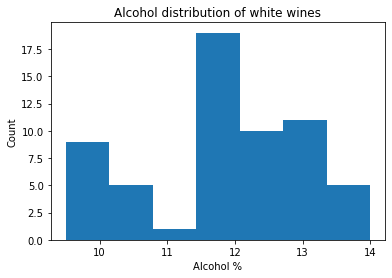

In [61]:
plt.hist(text_data_whites['Alcohol'], bins = 'auto')

plt.xlabel('Alcohol %')
plt.ylabel('Count')
plt.title('Alcohol distribution of white wines')

plt.show()

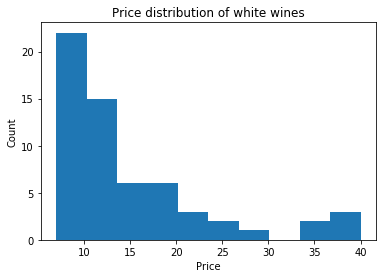

In [62]:
plt.hist(text_data_whites['Price'], bins = 'auto')

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price distribution of white wines')

plt.show()

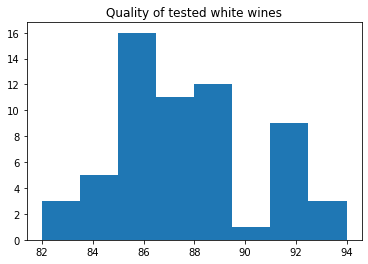

In [63]:
plt.hist(text_data_whites['Score'], bins = 'auto')
plt.title('Quality of tested white wines')
plt.show()

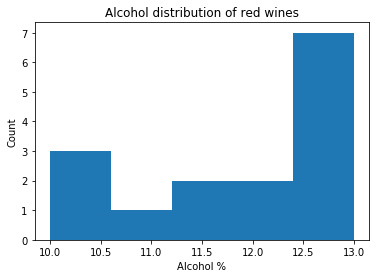

In [64]:
plt.hist(text_data_reds['Alcohol'], bins = 'auto')

plt.xlabel('Alcohol %')
plt.ylabel('Count')
plt.title('Alcohol distribution of red wines')

plt.show()

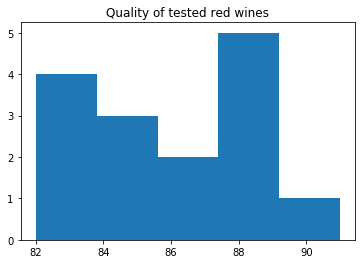

In [65]:
plt.hist(text_data_reds['Score'], bins = 'auto')
plt.title('Quality of tested red wines')
plt.show()

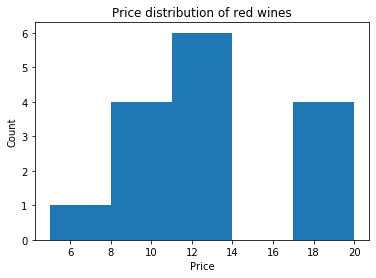

In [66]:
plt.hist(text_data_reds['Price'], bins = 'auto')

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price distribution of red wines')

plt.show()

Not the best histograms but we still can get some information out of them as we can see we have more pricey wines from the white ones compared to the red ones also some of the white wines have more alcohol in them and finally the score distribution looks similar. Both red and white are around the 88 points.

And why is this? Why do we have more data for white wines compared to red wines ? According to Wine folly the vast majority of Vinho Verde wines are white. This is because the region where this wine comes is quite cool and often rainy which makes it hard to ripen red grapes.

In [67]:
# merge the data for ease of use
data = [text_data_reds, text_data_whites]

In [68]:
text_data_wines = pd.concat(data)

In [69]:
text_data_wines.head()

,Wine name,Score,Price,Year,Alcohol,Country of origin,Review,Sommelier,Wine type
0,Adega Ponte da Barca Superior Vinho (Vinho Verde),86,12.0,2018,11.75,PORTUGAL,A lightly sparkling red wine this is tannic an...,Roger Voss,1
1,Aphros Vinhao Vinho (Vinho Verde),87,20.0,2018,12.50,PORTUGAL,A red Vinho Verde from the Lima Valley this is...,Roger Voss,1
2,Anselmo Mendes Pardusco Escolha Red (Vinho Verde),88,12.0,2015,12.50,PORTUGAL,Soft and perfumed this red Vinho Verde is pack...,Roger Voss,1
3,Casal Paco Padreiro Aphros Vinhao (Vinho Verde),88,18.0,2011,12.00,PORTUGAL,If any producer is going to make sense of Vinh...,Roger Voss,1
4,Casal Paco Padreiro Afros Tinto Red (Vinho Verde),88,17.0,2010,12.50,PORTUGAL,This biodynamic estate produces an amazingly i...,Roger Voss,1


After actually getting a hold of your text data, the first step in cleaning up text data is to have a strong idea about what you’re trying to achieve, and in that context review your text to see what exactly might help.

In [70]:
reviews = []

for line in text_data_wines['Review']:
    reviews.append(line)

In [71]:
reviews = " ".join([str(reviews) for elem in reviews])

We can convert all words to lowercase by calling the lower() function on each word.

This means that the vocabulary will shrink in size, but some distinctions are lost (e.g. “Apple” the company vs “apple” the fruit is a commonly used example).

For example:

In [72]:
reviews = reviews.lower()

Split by Whitespace
Clean text often means a list of words or tokens that we can work with in our machine learning models.

This means converting the raw text into a list of words and saving it again.

A very simple way to do this would be to split the document by white space, including ” “, new lines, tabs and more. We can do this in Python with the split() function on the loaded string.

In [73]:
words = reviews.split()
print(words[:10])

["['a", 'lightly', 'sparkling', 'red', 'wine', 'this', 'is', 'tannic', 'and', 'full']


We may want the words, but without the punctuation like commas and quotes. We also want to keep contractions together.

One way would be to split the document into words by white space, then use string translation to replace all punctuation with nothing (e.g. remove it).

Python provides a constant called string.punctuation that provides a great list of punctuation characters. 

We can use the function maketrans() to create a mapping table. We can create an empty mapping table, but the third argument of this function allows us to list all of the characters to remove during the translation proces

For example:

In [74]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]

NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words).

It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens. Contractions are split apart (e.g. “What’s” becomes “What” “‘s“). Quotes are kept, and so on.

For example:

In [75]:
tokens = word_tokenize(reviews)
words = [word for word in tokens if word.isalpha()]

In [76]:
words[:5]

['a', 'lightly', 'sparkling', 'red', 'wine']

Stop words are those words that do not contribute to the deeper meaning of the phrase.

They are the most common words such as: “the“, “a“, and “is“.

For some applications like documentation classification, it may make sense to remove stop words.

NLTK provides a list of commonly agreed upon stop words for a variety of languages, such as English. They can be loaded as follows:

In [77]:
stop_words = set(stopwords.words('english'))

After that we clean the text from the stopwords and count what is left.

In [78]:
text_meaningful_words = [word for word in words if word not in stop_words]
counter_meaningful_words = Counter(text_meaningful_words)

In [79]:
for word, count in counter_meaningful_words.most_common():
    print(word, count)

wine 8850
drink 4650
acidity 3075
vinho 2775
verde 2700
crisp 2625
flavors 2175
ripe 1875
red 1350
dry 1350
bright 1275
alvarinho 1275
ready 1200
fruit 1125
fruity 1125
fruits 1125
apple 1125
character 1050
light 975
texture 975
textured 975
rich 900
touch 900
comes 900
lightly 825
richness 825
well 825
citrus 825
lemon 825
soft 750
creamy 750
gives 675
apples 675
edge 675
prickle 675
fruitiness 675
blend 675
smooth 600
summer 600
aftertaste 525
spice 525
lively 525
refreshing 525
full 450
also 450
fresh 450
great 450
northern 450
grape 450
loureiro 450
give 450
region 450
end 450
fine 450
style 375
intensely 375
perfumed 375
wood 375
attractive 375
along 375
tangy 375
sweet 375
freshness 375
early 375
grapes 375
think 300
tannins 300
stalky 300
zesty 300
typical 300
balanced 300
intense 300
final 300
portugal 300
aging 300
impressive 300
weight 300
tongue 300
lime 300
classic 300
pear 300
giving 300
balance 300
melgaco 300
minerality 300
depth 225
sardines 225
currant 225
food 225
spi

We see some words that do not carry a lot of meaning in our results like "vinho", "verde", "drink", "wine". The thing is we know that the data set is for vinho verde wine so these words do not have a lot of meaning for us and for the current test so let us try to remove them from the word counter before we graph our results. We will consider them as stop words and add them to our dictionary and remove them for the counter.

Also we can consider "drink" as a stop word because obviously we will drink the wine we will not eat it.

In [80]:
for_stop = ('vinho verde wine drink')
new_stop_words = set(for_stop.split(" "))
text_meaningful_words = [word for word in text_meaningful_words if word not in new_stop_words]

In [81]:
# Check the new result
counter_meaningful_words = Counter(text_meaningful_words)
for word, count in counter_meaningful_words.most_common():
    print(word, count)

acidity 3075
crisp 2625
flavors 2175
ripe 1875
red 1350
dry 1350
bright 1275
alvarinho 1275
ready 1200
fruit 1125
fruity 1125
fruits 1125
apple 1125
character 1050
light 975
texture 975
textured 975
rich 900
touch 900
comes 900
lightly 825
richness 825
well 825
citrus 825
lemon 825
soft 750
creamy 750
gives 675
apples 675
edge 675
prickle 675
fruitiness 675
blend 675
smooth 600
summer 600
aftertaste 525
spice 525
lively 525
refreshing 525
full 450
also 450
fresh 450
great 450
northern 450
grape 450
loureiro 450
give 450
region 450
end 450
fine 450
style 375
intensely 375
perfumed 375
wood 375
attractive 375
along 375
tangy 375
sweet 375
freshness 375
early 375
grapes 375
think 300
tannins 300
stalky 300
zesty 300
typical 300
balanced 300
intense 300
final 300
portugal 300
aging 300
impressive 300
weight 300
tongue 300
lime 300
classic 300
pear 300
giving 300
balance 300
melgaco 300
minerality 300
depth 225
sardines 225
currant 225
food 225
spicy 225
intensity 225
brings 225
green 225
h

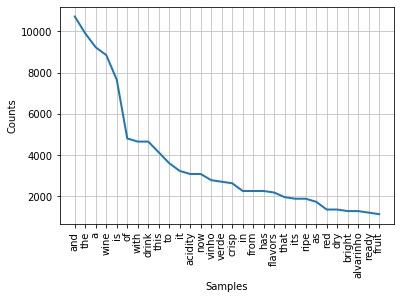

In [82]:
#With stopwords
fdist = FreqDist(words)
fdist.plot(30, cumulative = False)
plt.show()

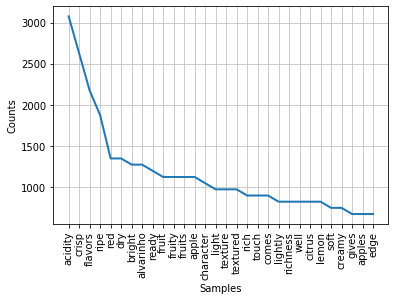

In [83]:
# Without stop words
fdist = FreqDist(counter_meaningful_words)
fdist.plot(30, cumulative = False)
plt.show()

As we can see removing the changes our data a lot. Because these words do not carry any meaning it is not a problem to remove them and work without them. Working with ML requires meaningful data. Following this rule means that removing them could imrpove our algorithm.

As we can see at the 1125 range we have fruit, fruity, fruits. The way to fix this is to use stemming or lemmitazation. Below is the graph and the word counter when on the data is applied steming and lemmitazation. Let us see what will happen when we use stemming and lemmitazation. Will we have a big change or the result or will the effect be minimal and which works better for our case.

In [84]:
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in text_meaningful_words]
print(stemmed[:30])

['lightli', 'sparkl', 'red', 'tannic', 'full', 'acid', 'style', 'drinker', 'either', 'love', 'hate', 'think', 'cut', 'oili', 'food', 'red', 'lima', 'valley', 'rich', 'style', 'tannin', 'acid', 'also', 'stalki', 'flavor', 'fruit', 'ripe', 'intens', 'fresh', 'readi']


In [85]:
counter_stemmed_words = Counter(stemmed)

In [86]:
for word, count in counter_stemmed_words.most_common():
    print(word, count)

acid 3075
crisp 2700
flavor 2325
fruit 2250
ripe 2025
textur 1950
fruiti 1800
appl 1800
rich 1725
bright 1425
give 1425
red 1350
dri 1350
alvarinho 1275
readi 1200
charact 1050
touch 1050
come 1050
light 975
intens 900
lightli 825
fresh 825
well 825
grape 825
citru 825
creami 825
lemon 825
soft 750
edg 675
prickl 675
blend 675
balanc 600
smooth 600
summer 600
age 600
attract 600
sweet 600
aftertast 525
spice 525
live 525
miner 525
refresh 525
full 450
also 450
produc 450
great 450
northern 450
bring 450
loureiro 450
delici 450
region 450
end 450
fine 450
style 375
perfum 375
zesti 375
wood 375
domin 375
impress 375
along 375
tangi 375
pear 375
lift 375
earli 375
think 300
food 300
tannin 300
stalki 300
make 300
typic 300
final 300
portug 300
weight 300
show 300
tongu 300
lime 300
classic 300
pepper 300
melgaco 300
sparkl 225
depth 225
year 225
sardin 225
currant 225
spici 225
matur 225
green 225
home 225
extra 225
harvest 225
name 225
clean 225
low 225
ferment 225
aromat 225
slight 225

We have some increase in several words but it also changed some of the words and not in a good manner. Like "fruity" to "fruiti" or "apple" to "appl" and etc. Comparing both graphs with the stemmed text and the one that is not stemmed we can clearly see that there is a difference. Let`s plot it !

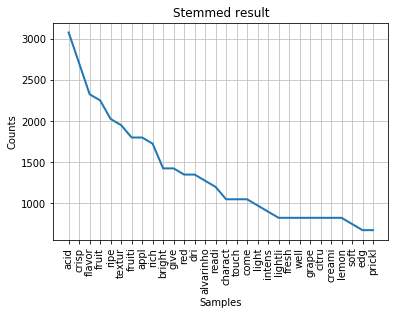

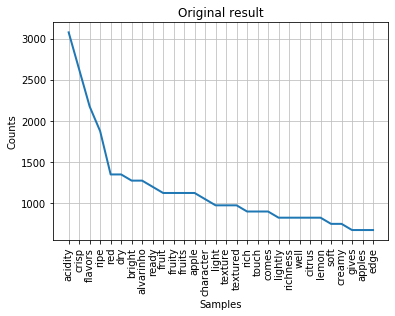

In [87]:
plt.title("Stemmed result")
fdist = FreqDist(stemmed)
fdist.plot(30, cumulative = False)
plt.show()
plt.title("Original result")
fdist = FreqDist(counter_meaningful_words)
fdist.plot(30, cumulative = False)
plt.show()

In [88]:
from nltk.stem import WordNetLemmatizer

In [89]:
wordnet = WordNetLemmatizer()
lemmatized = [wordnet.lemmatize(word) for word in text_meaningful_words]

In [90]:
counter_lemmed_words = Counter(lemmatized)
for word, count in counter_lemmed_words.most_common():
    print(word, count)

acidity 3075
crisp 2625
flavor 2325
fruit 2250
ripe 1875
apple 1800
red 1350
dry 1350
bright 1275
alvarinho 1275
ready 1200
fruity 1125
give 1125
character 1050
touch 1050
come 975
light 975
texture 975
textured 975
rich 900
lightly 825
richness 825
well 825
grape 825
citrus 825
lemon 825
soft 750
creamy 750
edge 675
prickle 675
fruitiness 675
blend 675
smooth 600
summer 600
aftertaste 525
spice 525
lively 525
refreshing 525
full 450
also 450
fresh 450
great 450
northern 450
loureiro 450
sweet 450
region 450
end 450
fine 450
style 375
intensely 375
perfumed 375
wood 375
attractive 375
along 375
tangy 375
freshness 375
pear 375
early 375
think 300
food 300
tannin 300
stalky 300
zesty 300
make 300
typical 300
balanced 300
intense 300
final 300
portugal 300
aging 300
impressive 300
weight 300
tongue 300
lime 300
classic 300
giving 300
balance 300
melgaco 300
minerality 300
depth 225
producer 225
year 225
sardine 225
currant 225
spicy 225
intensity 225
brings 225
green 225
home 225
mineral

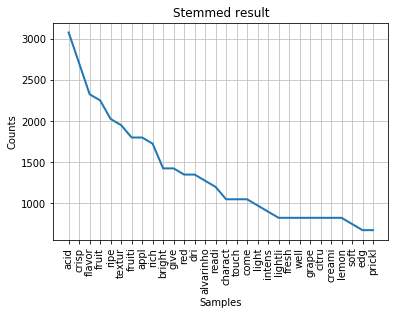

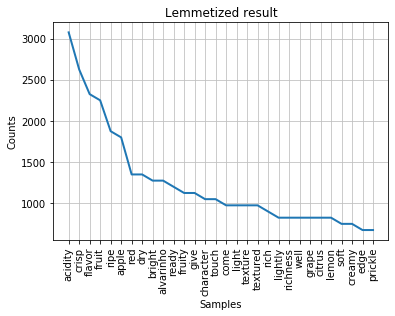

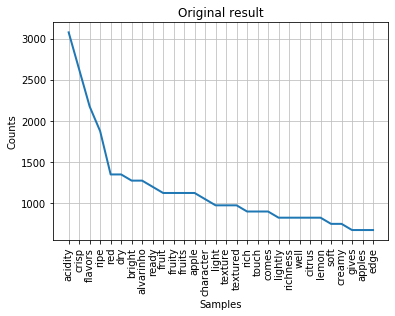

In [91]:
plt.title("Stemmed result")
fdist = FreqDist(stemmed)
fdist.plot(30, cumulative = False)
plt.show()
plt.title("Lemmetized result")
fdist = FreqDist(lemmatized)
fdist.plot(30, cumulative = False)
plt.show()
plt.title("Original result")
fdist = FreqDist(counter_meaningful_words)
fdist.plot(30, cumulative = False)
plt.show()

We see difference in our results between lemmatazation and stemming and also that the lemmatized result is also really close to the original data.

* But how to choose which one we are going to use ? 
* Which is better ? 
* What are the use cases of each one?

First we need to explore what do these operations do and after that we will need to choose one based on their functions and use cases. So let`s explore stemming and lemmitazation.

### Stemming and Lemmatization

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. A quick example will look like this:

Playing -> Play <br>
Plays   -> Play <br>
Played  -> Play <br>

In the above words we have a common root form "play".

am, are, is -> be

Car, cars, car`s -> car

Using the above mapping a sentence could be normalized as follows:

The boy`s cars are different colors -> the boy car be differ color


Above examples explain the concept of normalization of text, although normalization of text is not restricted to only written document but to speech as well. Stemming and Lemmatization helps us to achieve the root forms (sometimes called synonyms in search context) of inflected (derived) words. Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced.

Stemming and Lemmatization are widely used in tagging systems, indexing, SEOs, Web search results, and information retrieval. For example, searching for fish on Google will also result in fishes, fishing as fish is the stem of both words.

What is stemming and lemmatization ?

* Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

* Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

#### Stemming or lemmatization ?

If speed is the focus then stemming should be used since lemmatizers scan a corpus which consumes time and processing. It also depends on the application that is working on that decides if stemmers should be used or lemmatizers.

So for the current use case i prefer to use a lemmatizer because it gives us a real word since speed is not an issue in our current situation.

An n-gram is a sequence of n words where n is a discrete number that can range from 1 to infinity! Below we are going to see what are the bigrams and trigrams of the data we are working with.

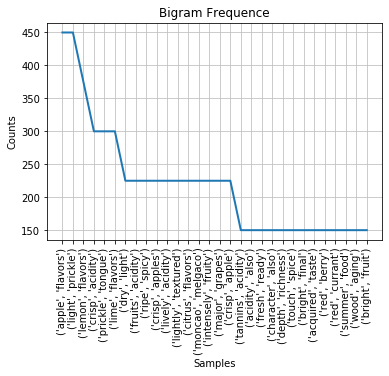

In [92]:
bigrm = list(nltk.bigrams(text_meaningful_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(30,title = 'Bigram Frequence')
plt.show()

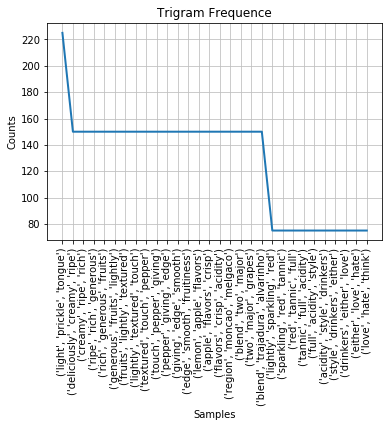

In [93]:
trigrm = list(nltk.trigrams(text_meaningful_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(30,title = 'Trigram Frequence')
plt.show()

Let`s dig a little bit deeper and try to see/verify do really wines have different words describing them. 

In [96]:
# Make the NLTK code into a function so we do not write it every time from scratch so we can check what are the
# words the sommelier uses to describe the wines. We are going to check the red and white but separatly.

def make_review(data):
    reviews = []
    for line in data['Review']:
        reviews.append(line)
        
    reviews = " ".join([str(reviews) for elem in reviews])
    data = reviews.lower()
    words_data = data.split()
    tokens_data = word_tokenize(data)
    words_data = [word for word in tokens_data if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words_data]
    text_meaningful_words = [word for word in words_data if word not in stop_words]
    counter_meaningful_words = Counter(text_meaningful_words)
    print("----------------------------------")
    print("Scroll to the bottom for the graph")
    print("----------------------------------")
    for word, count in counter_meaningful_words.most_common():
        print(word, count)
    fdist = FreqDist(counter_meaningful_words)
    fdist.plot(30, cumulative = False)

----------------------------------
Scroll to the bottom for the graph
----------------------------------
wine 6060
drink 3300
crisp 1980
acidity 1800
flavors 1620
vinho 1440
verde 1440
ripe 1260
alvarinho 1020
dry 960
apple 900
bright 840
fruity 780
ready 780
textured 780
light 720
texture 720
character 720
fruits 660
citrus 660
rich 660
lemon 660
comes 660
touch 600
well 600
creamy 600
fruit 600
apples 540
edge 540
prickle 540
soft 540
lightly 540
fruitiness 540
blend 540
gives 480
lively 420
refreshing 420
loureiro 360
give 360
aftertaste 360
smooth 360
region 360
end 360
summer 360
fine 360
richness 360
along 300
tangy 300
sweet 300
freshness 300
northern 300
spice 300
early 300
grapes 300
grape 300
tongue 240
lime 240
classic 240
pear 240
giving 240
balance 240
intensely 240
full 240
great 240
fresh 240
perfumed 240
melgaco 240
minerality 240
attractive 240
also 240
green 180
home 180
final 180
mineral 180
shows 180
extra 180
harvest 180
dominated 180
style 180
deliciously 180
pepp

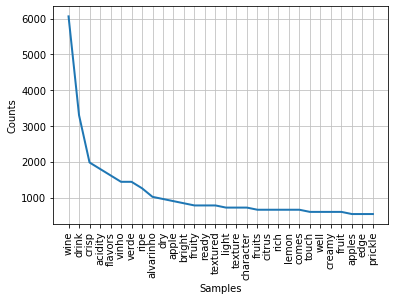

In [97]:
make_review(text_data_whites)

----------------------------------
Scroll to the bottom for the graph
----------------------------------
red 270
wine 255
vinho 195
verde 180
acidity 165
drink 105
fruit 75
richness 75
think 60
tannins 60
stalky 60
ripe 60
fruits 60
ready 45
bright 45
portugal 45
sardines 45
currant 45
aging 45
lightly 30
full 30
style 30
oily 30
also 30
flavors 30
fresh 30
character 30
depth 30
fruity 30
producer 30
biodynamic 30
touch 30
spice 30
balanced 30
smooth 30
wood 30
great 30
black 30
acquired 30
taste 30
dry 30
berry 30
summer 30
tight 30
food 30
crisp 30
weight 30
sparkling 15
tannic 15
drinkers 15
either 15
love 15
hate 15
cutting 15
foods 15
lima 15
valley 15
rich 15
intensely 15
perfumed 15
packed 15
zesty 15
juicy 15
aftertaste 15
going 15
make 15
sense 15
vinhao 15
casal 15
padreiro 15
well 15
typical 15
finish 15
within 15
year 15
estate 15
produces 15
amazingly 15
intense 15
firm 15
hint 15
comes 15
final 15
shocking 15
confirms 15
often 15
perhaps 15
best 15
left 15
local 15
market

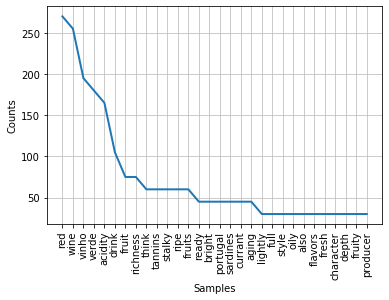

In [98]:
make_review(text_data_reds)

So as we can see the sommelier describes some of the flavors of the white wines with:
* lemon
* citrus
* apples
* lime 
* crisp

and the red wines with:

* tannins
* berry
* stalky
* ripe
* oily

from here we see that there is a lot of difference in the "dictionary" the sommelier used to describe the wines.

Sometimes i find myself doing things on hand and after that i ask myself "Is there an algorithm for that?" and normally there is. Currently I have some domain knoweledge and the data set is not that big so I can wrap my head around the data but there will be a situation which this needs to be automated and it would be near to impossible or really time consuming doing everything by hand. So lets try to automate the process from above and see what result we are going to get. We are going to use Word2Vec for this example.

Word2Vec is technique for natural language processing. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, word2vec represents each distinct word with a particular list of numbers called a vector. The vectors are chosen carefully such that high cosine similarity between two vectors correlates with high semantic similarity between the words they represent. It  is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

In [99]:
model = Word2Vec([text_meaningful_words], 
                 size=1000, 
                 window=2, 
                 min_count=1)

model.train([text_meaningful_words],total_examples=len([text_meaningful_words]),epochs=10)

(100000, 900750)

In [100]:
w1 = 'red'
model.wv.most_similar(positive = w1, topn=10)

[('currant', 0.9965435862541199),
 ('stalky', 0.9958600997924805),
 ('tannins', 0.9951432347297668),
 ('acquired', 0.994546115398407),
 ('tight', 0.9943639039993286),
 ('everyone', 0.9940214157104492),
 ('nose', 0.9939801096916199),
 ('fore', 0.993531346321106),
 ('flavor', 0.9934325814247131),
 ('say', 0.9934144020080566)]

In [101]:
w2 = 'white'
model.wv.most_similar(positive = w2, topn=10)

[('beautifully', 0.9988973140716553),
 ('aged', 0.9986147284507751),
 ('finish', 0.998261570930481),
 ('intense', 0.9982485771179199),
 ('touches', 0.9979301691055298),
 ('amazingly', 0.9977909326553345),
 ('tannic', 0.9976023435592651),
 ('view', 0.997368335723877),
 ('highlights', 0.9973430633544922),
 ('produces', 0.9973083734512329)]

In [102]:
citrus = model.wv.similarity(w1 ='white', w2='citrus')
print(f'Citrus similarity: {citrus:.2f}')
lime = model.wv.similarity(w1 = 'white', w2='lime')
print(f'Lime similarity: {lime:.2f}')
lemon = model.wv.similarity(w1 ='white', w2='lemon')
print(f'Lemon similarity: {lemon:.2f}')
apples = model.wv.similarity(w1 ='white', w2='apple')
print(f'Apples similarity: {apples:.2f}')
crisp = model.wv.similarity(w1 ='white', w2='crisp')
print(f'Crisp similarity: {crisp:.2f}')

Citrus similarity: 0.98
Lime similarity: 0.98
Lemon similarity: 0.97
Apples similarity: 0.97
Crisp similarity: 0.96


In [103]:
tannins = model.wv.similarity(w1 ='red', w2='tannins')
print(f'Tannins similarity: {tannins:.2f}')
stalky = model.wv.similarity(w1 ='red', w2='stalky')
print(f'Stalky similarity: {stalky:.2f}')
berry = model.wv.similarity(w1 ='red', w2='berry')
print(f'Berry similarity: {berry:.2f}')
oily = model.wv.similarity(w1 = 'red', w2='oily')
print(f'Oily similarity: {oily:.2f}')
ripe = model.wv.similarity(w1 ='red', w2='ripe')
print(f'Ripe similarity: {apples:.2f}')

Tannins similarity: 1.00
Stalky similarity: 1.00
Berry similarity: 0.99
Oily similarity: 0.99
Ripe similarity: 0.97
